In [33]:
#importing all the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
#input the csv file which contains details of Housing-data
raw_data = pd.read_csv('Housing_Data.csv')
print(raw_data)

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0                             4.09     230

In [35]:
#high-level information about the data set like colmuns and its count and dtype
raw_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [36]:
#info about the columns in counts , mean, std etc..
raw_data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [37]:
raw_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [38]:
#columns names from the dataset 
raw_data.loc[:-1]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address


In [39]:
#display the columns present in the dataset
raw_data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [40]:
#Selecting the features to train the model and storing in x
x = raw_data[['Avg. Area Income','Avg. Area House Age', 'Avg. Area Number of Rooms',

               'Avg. Area Number of Bedrooms', 'Area Population']]

In [45]:
#Selecting the predicting value of the model
y = raw_data['Price']

In [46]:
#module to split the dataset
from sklearn.model_selection import train_test_split

In [47]:
#splitting the dataset into training and testing
x_train , x_test , y_train , y_test = train_test_split(x , y, test_size=0.3)

In [48]:
#module for the model 
from sklearn.linear_model import LinearRegression

In [49]:
#creating a object of the LinearRegression model
model = LinearRegression()

In [50]:
#fit the model to train the model
model.fit(x_train,y_train)

LinearRegression()

In [51]:
#coeffiecients of the model
print(model.coef_)

[2.15097567e+01 1.64751943e+05 1.22223158e+05 6.16978349e+02
 1.52468758e+01]


In [52]:
#intercept of the model
print(model.intercept_)

-2636830.091193594


In [53]:
pd.DataFrame(model.coef_,x.columns ,columns = ['Coeff'])

,Coeff
Avg. Area Income,21.509757
Avg. Area House Age,164751.943489
Avg. Area Number of Rooms,122223.157629
Avg. Area Number of Bedrooms,616.978349
Area Population,15.246876


In [54]:
#creating the object to predict the model
predictions=model.predict(x_test)

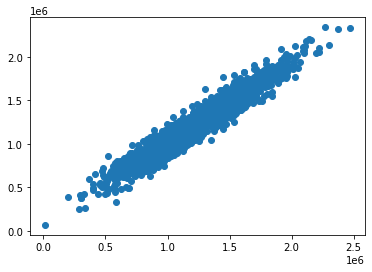

In [55]:
#checking wheather the predictions made are correct are or not
plt.scatter(y_test , predictions)

(array([  3.,  17.,  90., 214., 313., 361., 293., 156.,  43.,  10.]),
 array([-337294.04945726, -272792.36521963, -208290.680982  ,
        -143788.99674436,  -79287.31250673,  -14785.6282691 ,
          49716.05596853,  114217.74020616,  178719.42444379,
         243221.10868143,  307722.79291906]),
 <BarContainer object of 10 artists>)

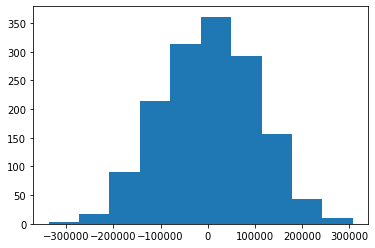

In [56]:
#checking wheather the model is uniformly distributed or not
plt.hist(y_test - predictions)

In [57]:
#testing the performance of the model using metrics model for MAE , MSE and RMSE
from sklearn import metrics

In [58]:
mae=metrics.mean_absolute_error(y_test , predictions)
print(mae)

81483.6083631361


In [59]:
mse=metrics.mean_squared_error(y_test , predictions)
print(mse)

10100827354.604208


In [60]:
rmse=np.sqrt(mse)
print(rmse)

100502.8723699189
